# Theory

TODO: should not have redo (do?) the Gaussian splatting to orient the VTP.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import facets_drivers
import os
user = os.environ.get('USER')

experimental_structure = f"/data/id01/inhouse/{user}/scratch/ewoks_01_experiment/S37_structural_properties.vti"
theory_dump_directory = f"/data/id01/inhouse/{user}/scratch/ewoks_02_theory/"

In [3]:
from ewoks import execute_graph

nodes = [
    {
        "id": "get_facets",
        "task_type": "class",
        "task_identifier": "facets_drivers.theory.GetFacets",
    },
    {
        "id": "get_orientation",
        "task_type": "class",
        "task_identifier": "facets_drivers.theory.GetOrientation",
    },
    {
        "id": "get_oriented_facets",
        "task_type": "class",
        "task_identifier": "facets_drivers.theory.GetOrientedFacets",
    },
]

links = [
    {
        "source": "get_facets",
        "target": "get_orientation",
        "data_mapping": [{"source_output": "vtp_facets_filepaths", "target_input": "vtp_facets_filepath"}],
    },
    {
        "source": "get_orientation",
        "target": "get_oriented_facets",
        "data_mapping": [{"source_output": "orientation_filepath", "target_input": "orientation_filepath"}],
    },
]

# `links` non-mandatory if single computation
workflow = {"graph": {"id": "hello_world"}, "nodes": nodes, "links": links}

# Use editor, should be better
inputs = [
    {"id": "get_facets", "name": "scratch_dirpath", "value": theory_dump_directory},
    {"id": "get_facets", "name": "vti_filepath", "value": experimental_structure},

    {"id": "get_orientation", "name": "scratch_dirpath", "value": theory_dump_directory},
    
    {"id": "get_oriented_facets", "name": "scratch_dirpath", "value": theory_dump_directory},
    {"id": "get_oriented_facets", "name": "vti_filepath", "value": experimental_structure},
]

If this is slow (few seconds), you do not have a GPU.
Reading input file: /data/id01/inhouse/polack/scratch/ewoks_01_experiment/S37_structural_properties.vti
Processing VTI file with 7880599 points and 7762392 cells
Auto-detected iso-value: 0.500000
Extracted surface: 25082 points, 50160 triangles
Starting facet analysis...
Processing 50160 triangles with total area 361786.326102
Using splat radius: 0.200000
Creating Gaussian splat...
Creating single-point splat for measurements...
Converting to ITK format...
Applying H-minima filter...
Finding regional minima...
Labeling connected components...
Found 31 initial regions
Applying morphological watershed...
Additional watershed iteration 1/2
Additional watershed iteration 2/2
Analyzing facets...
Generating outputs...
Matching 31 hull faces to 31 facets based on normal similarity.
Generating Miller Index labels for hull...
Creating detailed OBJ file (from output0): exp.obj
Writing Original mesh with facet data to: exp_0.vtp
Writing Hull w

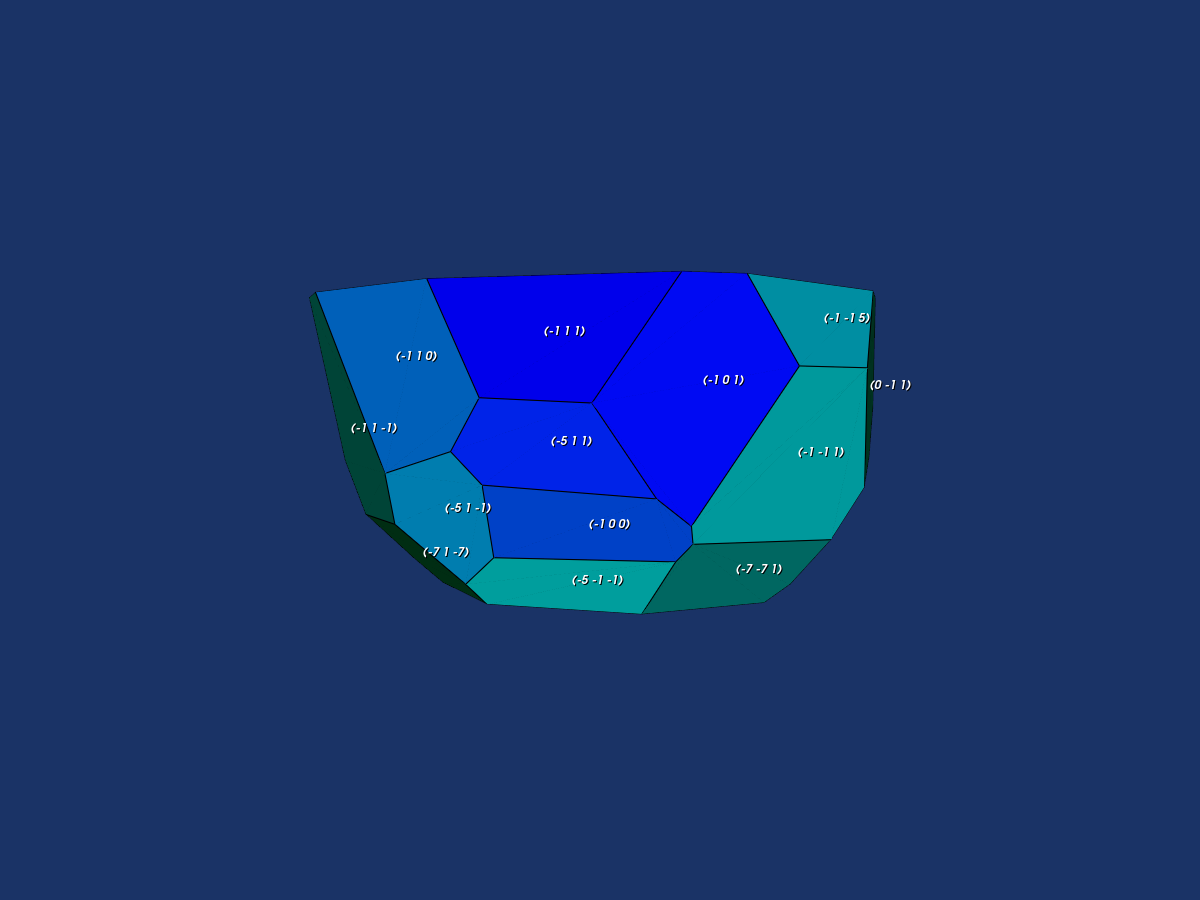

Analysis complete! Found 31 facets.
Large planar faces are in: oriented_exp_1.vtp

Facet Information (sample):
  Facet 1: WorldCenter=(650.592,760.167,36.692), Normal=(-0.285,0.020,-0.958), RelSize=0.011486
  Facet 30: WorldCenter=(756.919,757.772,394.593), Normal=(0.298,0.003,0.954), RelSize=0.010264
  Facet 2: WorldCenter=(736.350,714.844,43.751), Normal=(0.203,-0.323,-0.925), RelSize=0.016047
  Facet 16: WorldCenter=(857.063,672.909,223.502), Normal=(0.829,-0.560,-0.010), RelSize=0.006853
  Facet 3: WorldCenter=(818.141,751.272,72.987), Normal=(0.662,-0.047,-0.748), RelSize=0.006370
  Facet 22: WorldCenter=(786.465,639.026,306.192), Normal=(0.447,-0.797,0.406), RelSize=0.010384
  Facet 9: WorldCenter=(606.120,646.671,124.770), Normal=(-0.531,-0.723,-0.441), RelSize=0.007671
  Facet 17: WorldCenter=(696.915,619.533,211.836), Normal=(-0.039,-0.999,-0.016), RelSize=0.066086
  Facet 4: WorldCenter=(573.553,793.570,92.963), Normal=(-0.680,0.395,-0.618), RelSize=0.006456
  Facet 6: WorldC

In [4]:
result = execute_graph(workflow, inputs=inputs)

In [5]:
result

{'vtp_oriented_files': ['/data/id01/inhouse/polack/scratch/ewoks_02_theory/oriented_exp_0.vtp',
  '/data/id01/inhouse/polack/scratch/ewoks_02_theory/oriented_exp_1.vtp',
  '/data/id01/inhouse/polack/scratch/ewoks_02_theory/oriented_exp_2.vtp',
  '/data/id01/inhouse/polack/scratch/ewoks_02_theory/oriented_exp_3.vtp']}